## EDA for Final Project- Endangered Langauges
Jordan Andersen

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.chdir('/workspace')

#!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


### Dataframe exploration

In [4]:
## Read csv

df = pd.read_parquet("Project/datasci207-final-project/Data Cleaning/final_dataset.parquet")
df.head()

,official_name,level,speakers,country,official,regional,minority,national,widely_spoken,country_count,max_urbanization,max_internet_use
0,!Xun,Vulnerable,18000,South Africa;Namibia;Angola,0,0,0,0,0,3,68.819,75.7
1,(Lower) Tanana,Critically Endangered,25,United States,0,0,0,0,0,1,83.298,93.1
2,A'ingae,Vulnerable,1500,Colombia;Ecuador,0,0,0,0,0,2,82.354,77.3
3,Aasáx,Extinct,0,Tanzania,0,0,0,0,0,1,37.409,29.1
4,Abaga,Critically Endangered,5,Papua New Guinea,0,0,0,0,0,1,13.723,24.1


In [5]:
# Column names
print(f'Columns: {df.columns}\n')

# Df shape
print(f'Shape of dataframe: {df.shape}')

Columns: Index(['official_name', 'level', 'speakers', 'country', 'official', 'regional',
       'minority', 'national', 'widely_spoken', 'country_count',
       'max_urbanization', 'max_internet_use'],
      dtype='object')

Shape of dataframe: (2808, 12)


In [6]:
# Unique values
print(f'Unique values in level column: {df['level'].unique()}')

Unique values in level column: ['Vulnerable' 'Critically Endangered' 'Extinct' 'Endangered' 'Threatened'
 'Severely Endangered' 'At risk' 'Not Endangered']


In [20]:
# Counts in language recognition columns

print(f' There are {sum(df['official'] == True)} languages with "Official language status"\n')

print(f' There are {sum(df['regional'] == True)} languages with "Regional language status"\n')

print(f' There are {sum(df['minority'] == True)} languages with "Minority language status"\n')

print(f' There are {sum(df['national'] == True)} languages with "National language status"\n')

print(f' There are {sum(df['widely_spoken'] == True)} languages that are widely spoken\n')

 There are 49 languages with "Official language status"

 There are 46 languages with "Regional language status"

 There are 35 languages with "Minority language status"

 There are 33 languages with "National language status"

 There are 22 languages that are widely spoken



In [8]:
# Counts in level column

df.groupby('level').size()

level
At risk                   65
Critically Endangered    386
Endangered               653
Extinct                  172
Not Endangered            28
Severely Endangered      333
Threatened               747
Vulnerable               424
dtype: int64

In [9]:
# Speaker count minimum and maximum

print(f'Lowest speaker count: {df['speakers'].min()}\n')

print(f'Highest speaker count: {df['speakers'].max()}')

Lowest speaker count: 0

Highest speaker count: 1528000000


### Count of languages in each level of endangerment

**Question:** How many languages are in each level of endangerment or non-endangerment?

The plot below shows the number of languages categorized by each level of endangerment. The majority of our dataset is made up of threatened and endangered languages. There are significantly fewer at-risk, extinct and non-endangered languages. A model might struggle to predict these categories since they are underrepresented in the data. The low count of non-endangered languages is expected based on the literature, which states that the majority of the 7,000 languages in the world are spoken by a small minority of the global population. 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Vulnerable'),
  Text(1, 0, 'Critically Endangered'),
  Text(2, 0, 'Extinct'),
  Text(3, 0, 'Endangered'),
  Text(4, 0, 'Threatened'),
  Text(5, 0, 'Severely Endangered'),
  Text(6, 0, 'At risk'),
  Text(7, 0, 'Not Endangered')])

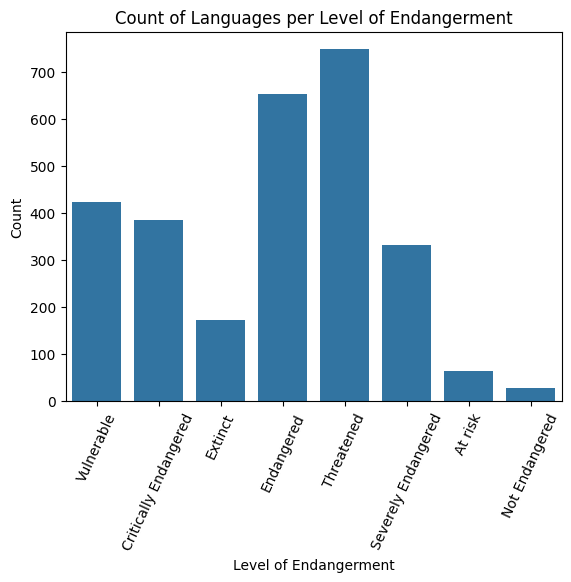

In [12]:
sns.countplot(data= df, x= 'level')
plt.title('Count of Languages per Level of Endangerment')
plt.xlabel('Level of Endangerment')
plt.ylabel('Count')
plt.xticks(rotation= 65)

### Language status across endangerment types

**Question:** In each level of endangermment, how many of those languages hold political recognition?

The first thing to note in this plot is the y-axis, which only reaches ~17, is a small count compared to the next plot which will show the number of languages without political recognition. This tells us that languages with some level of recognition are already a relatively small subset in our data, whehter they are endangered or not. 

Interestingly, there are extinct languages listed as official languages. Upon further exploration, we find that all four belong to Bolivia, which lists any language spoken within the country as an official language. However, these langauges are listed as extinct because the native tribes who speak them have not been able to be contacted recently. 

Languages that are categorized as widely-spoken that fall into various levels of endangerment are languages that, although they may have speakers in adult generations, are not taught in school and lack fluency among younger generations. So, although they may be considered widely spoken today, future generations lack the ability to carry on the language in its current state. 

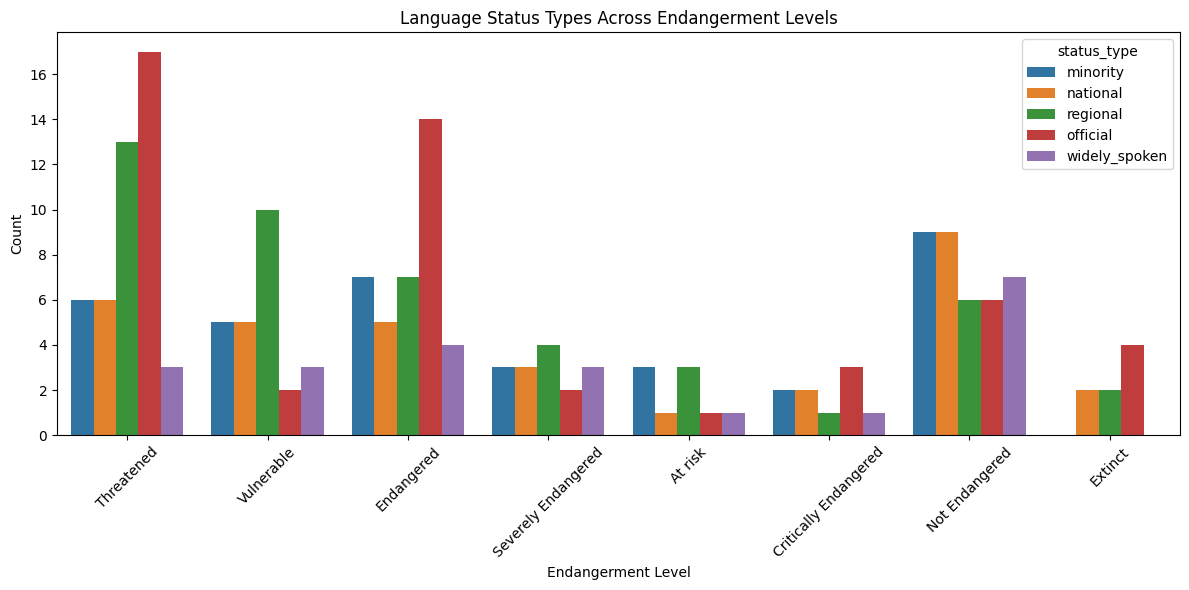

In [13]:
# Melt to long format
df_melted = df.melt(id_vars='level', value_vars=['minority', 'national', 'regional', 'official', 'widely_spoken'],
                    var_name='status_type', value_name='status_value')

# Filter only where status is True
df_filtered = df_melted[df_melted['status_value'] == True]

# Plot status/level count
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='level', hue='status_type')
plt.xticks(rotation=45)
plt.title('Language Status Types Across Endangerment Levels')
plt.xlabel('Endangerment Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
# Which is the country with a national language as an extinct langauge?

df[(df['level'] == 'Extinct') & (df['official'] == True)]['official_name']

427     Canichana
1324         Leco
2384     Toromona
2670     Yaminawa
Name: official_name, dtype: object

In [15]:
# What are the widely spoken languages listed as threatened, vulnerable and endangered?

df[(df['level'] == 'Threatened') & (df['widely_spoken'] == True)]['official_name']

6       Abau
2088    Sara
2444     Uda
Name: official_name, dtype: object

In [16]:
df[(df['level'] == 'Vulnerable') & (df['widely_spoken'] == True)]['official_name']

101     Andi
890       Ik
1848     Olo
Name: official_name, dtype: object

In [17]:
df[(df['level'] == 'Endangered') & (df['widely_spoken'] == True)]['official_name']

272     Batak
807      Guya
1858     Onin
2493      Uya
Name: official_name, dtype: object

### Languages without recognized political status

**Question:** How many languages lack any form of political recognition?

The plot below uses a larger y-axis scale to reflect the substantial number of languages that have no official political status in the countries where they are spoken. Languages classified as threatened or endangered account for the highest counts of unrecognized status, while non-endangered languages make up the smallest portion. This pattern aligns with existing literature, which suggests that endangered and threatened languages constitute the majority of the world’s linguistic diversity. Importantly, political recognition is used here as a proxy for language vitality by highlighting the role that institutional support may play in a language’s long-term survival.

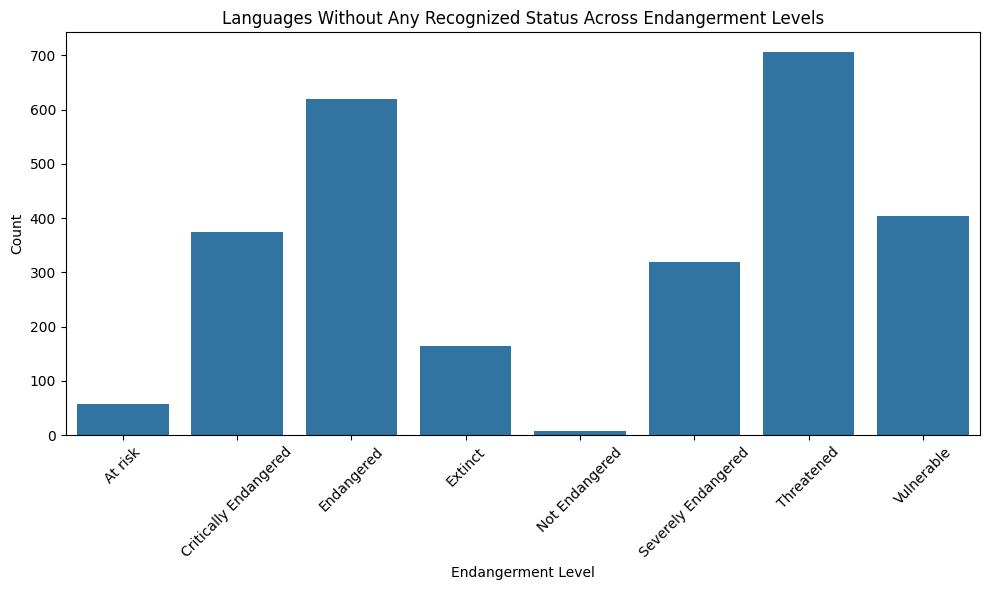

In [18]:
# Create a mask for rows where all status columns are False
status_cols = ['minority', 'national', 'regional', 'official', 'widely_spoken']
no_status_mask = ~(df[status_cols].any(axis=1))

df_no_status = df[no_status_mask]

# Plot the count of languages with no status by endangerment level
plt.figure(figsize=(10, 6))
sns.countplot(data=df_no_status, x='level', order=sorted(df_no_status['level'].unique()))
plt.xticks(rotation=45)
plt.title('Languages Without Any Recognized Status Across Endangerment Levels')
plt.xlabel('Endangerment Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Distribution of speaker counts by endangerment level

**Question:** How does the number of speakers vary across different levels of language endangerment?

Non-endangered languages show the highest median values of speakers, with all other categories showing lower median values. Extinct languages, as expected, show no speakers, and critically and severly endangered languages have the lowest medians after that. 

/usr/local/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/tmp/ipykernel_57384/2715220190.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


Text(0, 0.5, 'Number of Speakers (Log Scale)')

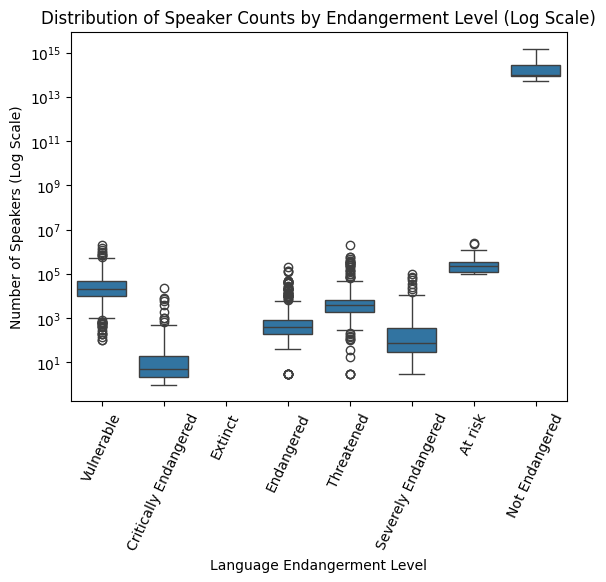

In [ ]:
ax = sns.boxplot(data= df, x= 'level', y= 'speakers', log_scale= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title('Distribution of Speaker Counts by Endangerment Level (Log Scale)')
plt.xlabel('Language Endangerment Level')
plt.ylabel('Number of Speakers (Log Scale)')

### Distribution of country counts by endangerment level

**Question:** How geographically widespread are languages across different levels of endangerment?

This boxplot shows the distribution of the number of countries in which languages are spoken, grouped by their endangerment level. Languages classified as Not Endangered are the most geographically widespread, with a presence in significantly more countries than any other group, and outliers reaching up to around 90 countries. 

In contrast, those that fall into endangered categories, especially those labeled Critically Endangered, Dormant, or Severely Endangered, are spoken in only one or a few countries. Vulnerable and Threatened languages also tend to be relatively localized. This suggests that languages with broader geographic reach are less likely to be endangered. The extreme localization of most endangered languages may make them more susceptible to endangerment and extinction.

/tmp/ipykernel_57384/2430994585.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=65)


Text(0, 0.5, 'Number of Countries where Spoken')

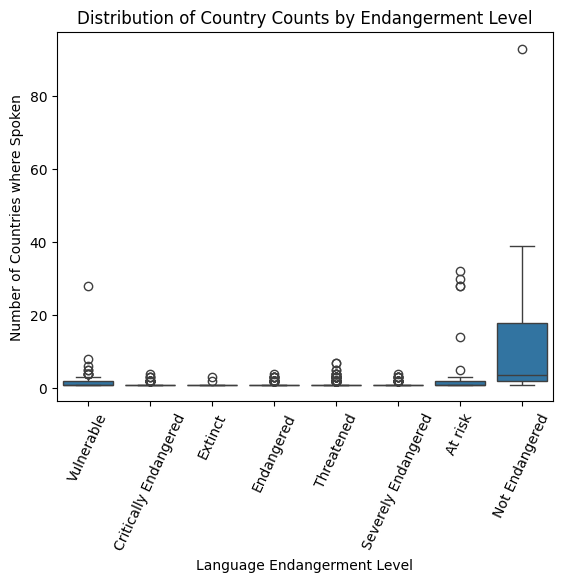

In [ ]:
ax = sns.boxplot(data= df, x= 'level', y= 'country_count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title('Distribution of Country Counts by Endangerment Level')
plt.xlabel('Language Endangerment Level')
plt.ylabel('Number of Countries where Spoken')